# 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [15]:
# 載入套件
import numpy as np 
import tensorflow as tf 

## 定義訓練函數

In [2]:
# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [3]:
# 定義預測值函數
def predict(X):
    return w  * X + b   

In [16]:
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 產生隨機資料

In [5]:
# 產生線性隨機資料100筆，介於 0-50
# n = 100
# X = np.linspace(0, 50, n) 
# y = np.linspace(0, 50, n) 
  
# # 資料加一點雜訊(noise)
# X += np.random.uniform(-10, 10, n) 
# y += np.random.uniform(-10, 10, n) 

In [18]:
# 產生線性隨機資料100筆
from sklearn.datasets import make_regression
X_org, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X_org.shape, y.shape

((100, 1), (100,))

In [19]:
X = X_org.reshape(-1)

In [20]:
y

array([  56.73356571,  -16.91462544,  -30.30257886,    9.23159976,
        -16.60693589,   33.82927714,  -35.43154192,   -2.45551612,
         22.44404058,   27.57110843,   36.49504267,   83.22518144,
         38.86944808,    8.97138325,  -54.84349159,   17.010299  ,
        -87.28187668,   19.36527016,   21.43443278, -122.36565954,
         14.80064851,    2.19013789,  -34.32886505,   23.76465723,
         79.41798157,   66.27510675,   -3.99324022,    4.87187537,
        -38.32550834,  -68.18380408,   22.97567173,   36.44228446,
          3.20225454,  -21.48307284,  -46.52256214,  -10.12589846,
        -24.05760705,    3.82739423,   59.93300399,    8.70926823,
         26.63471062,  -33.12283349,   61.08202839,  -20.22668772,
         -6.54973705,   -0.68345823,  -14.98246022,  -43.88442919,
         28.38013306,    8.85536146,   -2.02123161,   10.86507991,
        -40.10785821,  102.70525596,   22.01368265,   30.00091466,
         23.0919128 ,    4.96141152,   -8.40474199,  -86.55723

## 執行訓練

In [23]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y, epochs=100, lr=0.1)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 1896.3271484375
Epoch 1: Loss: 1372.6171875
Epoch 2: Loss: 1010.4037475585938
Epoch 3: Loss: 759.1415405273438
Epoch 4: Loss: 584.365478515625
Epoch 5: Loss: 462.4849853515625
Epoch 6: Loss: 377.29461669921875
Epoch 7: Loss: 317.623779296875
Epoch 8: Loss: 275.747802734375
Epoch 9: Loss: 246.30914306640625
Epoch 10: Loss: 225.5816650390625
Epoch 11: Loss: 210.9671630859375
Epoch 12: Loss: 200.64990234375
Epoch 13: Loss: 193.35818481445312
Epoch 14: Loss: 188.1995849609375
Epoch 15: Loss: 184.54689025878906
Epoch 16: Loss: 181.9584503173828
Epoch 17: Loss: 180.12289428710938
Epoch 18: Loss: 178.82040405273438
Epoch 19: Loss: 177.89569091796875
Epoch 20: Loss: 177.2388916015625
Epoch 21: Loss: 176.77215576171875
Epoch 22: Loss: 176.44036865234375
Epoch 23: Loss: 176.20440673828125
Epoch 24: Loss: 176.0365753173828
Epoch 25: Loss: 175.91717529296875
Epoch 26: Loss: 175.83218383789062
Epoch 27: Loss: 175.7716827392578
Epoch 28: Loss: 175.7286376953125
Epoch 29: Loss: 175.697

## 顯示迴歸線

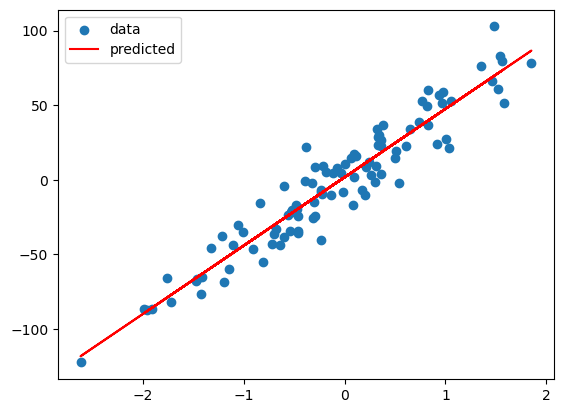

In [24]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend();